# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

#### Column Descriptions:

- **PatientId:** Identification of a patient.
- **AppointmentID:** Identification of each appointment.
- **Gender:** The gender of the patient.
- **ScheduledDay:** The date the appointment was scheduled.
- **AppointmentDay:** The actual date of the appointment.
- **Age:** Age of the patient.
- **Neighbourhood:** Location of the appointment.
- **Scholarship:** Whether the patient is on a welfare program.
- **Hipertension, Diabetes, Alcoholism, Handcap:** Medical conditions of the patient.
- **SMS_received:** Whether the patient received an SMS reminder.
- **No-show:** Indicates whether the patient showed up for the appointment (Yes = did not show up, No = showed up).

### Question(s) for Analysis

- Does receiving an SMS reminder influence no-show rates?
- Does having certain diseases affect whether a patient attends their appointment or not?
- How do no-show rates vary by neighborhood?
- Is there a relationship between age and no-show rates?
- Does having a scholarship affects showing up on a hospital appointment? 
- Is there a relationship between gender and no-show rates?

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [1]:
# import the importent packages 
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
# Check the size of the DataFrame
print("\nSize of the DataFrame:")
print(df.shape)


Size of the DataFrame:
(110527, 14)


In [3]:
# Check for missing values and data types
print("\nInformation about each column:\n")
df.info()


Information about each column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [5]:
# Describe the dataset to check for any unusual values
print("\nSummary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   

In [6]:
# Explore unique values in certain columns
print("\nUnique values in 'No-show' column:")
print(df['No-show'].unique())


Unique values in 'No-show' column:
['No' 'Yes']


In [7]:
# Check for unique values in the 'No-show' column to confirm expected values
print("\nValue counts in 'No-show' column:")
df['No-show'].value_counts()


Value counts in 'No-show' column:


No     88208
Yes    22319
Name: No-show, dtype: int64


##### Check for Any Duplicate Rows

In [8]:
# checking for duplicates
df.duplicated().sum()

0

In [9]:
# exploring the unique values of each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [10]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

### Observations from Data Wrangling
- Our dataset has no duplicated rows either.
- We notice there are no NaNs at all in our data.
- ScheduledDay and AppointmentDay needs to be casted to date data type.
- Gender needs to be converted into a categoy type
- Scholarship Hipertension Diabetes Alcoholism Handcap better be -boolean data type.
- No-show needs to be parsed and casted to boolean too.
- Age columns has inconsistant unique values like negative number.


### Data Cleaning
 

##### Rename columns for readability ("No-show" to "No_show").

In [11]:
# Rename columns for easier access
df.columns = df.columns.str.replace('-', '_')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### Ensure correct data types for date columns.

In [12]:
# Convert ScheduledDay and AppointmentDay to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

##### Handle any missing or erroneous data.

In [14]:
# dropping row with negative age and confirming changes
df.drop(df[df['Age'] < 0].index, inplace = True)
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


In [15]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

##### converting columns to be boolean.

In [16]:
# converting columns to bool and confirming changes
columns = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
df[columns] = df[columns].astype('bool')

df[columns].dtypes

Scholarship     bool
Hipertension    bool
Diabetes        bool
Alcoholism      bool
SMS_received    bool
dtype: object

##### Parsing and casting No-show column.

In [17]:
# mapping values to be more clear
df.loc[df['No_show'] == 'Yes', 'No_show'] = 0
df.loc[df['No_show'] == 'No', 'No_show'] = 1

# casting dt type to boolean and confirming changes
df['No_show'] = df['No_show'].astype(bool)

df['No_show'].dtypes

dtype('bool')

- The No-show column in your dataset originally contains strings, where 'Yes' means the patient did not show up to their appointment, and 'No' means the patient did show up.
- To make the analysis clearer, you're mapping these values to integers:
  - 'Yes' (no-show) is mapped to 0. 
  - 'No' (showed up) is mapped to 1.
- Now, 1 now represents attendance, and 0 represents a no-show, which can be easier to work with it.

##### Converting Gender to categorical variables

In [18]:
# converting column and confirming changes
df['Gender'] = df['Gender'].astype('category')

df['Gender'].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False)

##### Convert Age column for data type Optimization

In [19]:
# Convert Age column to a smaller integer type to make optimize for memory usage
df['Age'] = df['Age'].astype('int8')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  category           
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int8               
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  bool               
 8   Hipertension    110526 non-null  bool               
 9   Diabetes        110526 non-null  bool               
 10  Alcoholism      110526 non-null  bool               
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  bool               
 13  No_show       

In [21]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,True
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,True
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,True
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,True
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,True


<a id='eda'></a>
## Exploratory Data Analysis

In [22]:
# import the needed packages for visualization and EDA
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1: Does receiving an SMS reminder influence no-show rates?

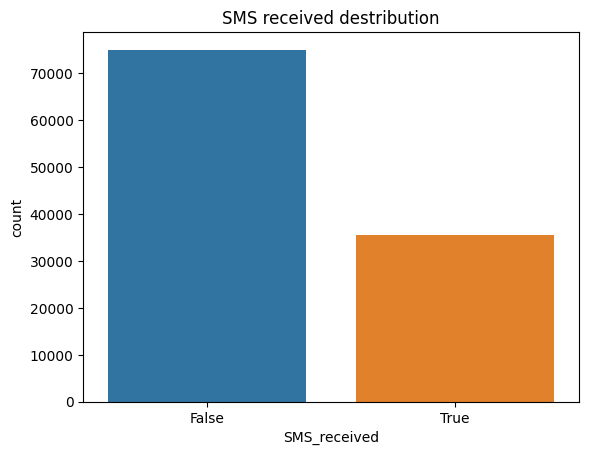

In [40]:
# Viewing count plot of receiving SMS distribution in df
sns.countplot(x = 'SMS_received', data = df)
plt.title("SMS received destribution")
plt.show()

- We noticed that most of our patients did not receive any SMS reminder of their appointments, could this affect their showing up?

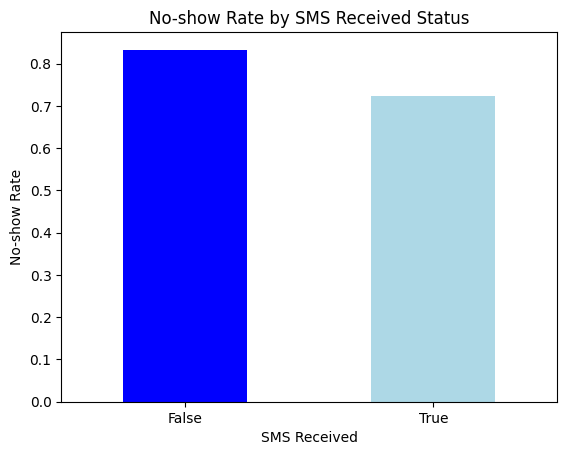

In [28]:
def plot_no_show_rate_by_sms(df):
    """
    Calculate and plot no-show rates for patients based on SMS received status.
    
    Parameters:
    df (DataFrame): The DataFrame containing appointment data with 'SMS_received' and 'No_show' columns.
    """
    # Calculate no-show rate by SMS received status
    sms_no_show_rate = df.groupby('SMS_received')['No_show'].mean()
    
    # Plot the no-show rate by SMS received status
    sms_no_show_rate.plot(kind='bar', color=['blue', 'lightblue'])
    plt.title("No-show Rate by SMS Received Status")
    plt.xlabel("SMS Received")
    plt.ylabel("No-show Rate")
    plt.xticks(rotation=0)
    plt.show()

plot_no_show_rate_by_sms(df)

- The chart suggests that patients who received an SMS reminder had a lower no-show rate than those who did not receive one. This implies that sending SMS reminders might help reduce the no-show rate.

### Question 2: Does having certain diseases affect whether a patient attends their appointment or not?

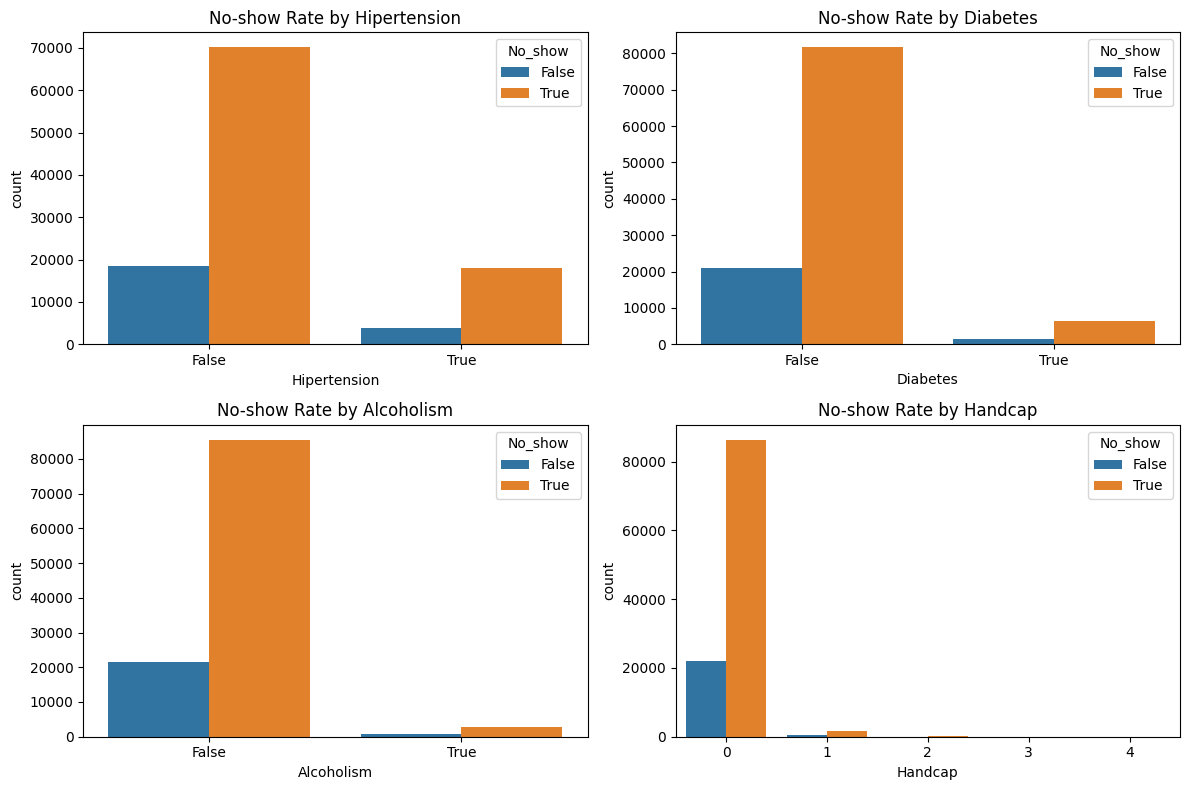

In [29]:
def plot_diseases_against_no_show(df):
    """
    Plot count of no-show rates based on health conditions: Hipertension, Diabetes, Alcoholism, and Handcap.
    
    Parameters:
    df (DataFrame): The DataFrame containing appointment data with 'Hipertension', 'Diabetes',
                    'Alcoholism', 'Handcap', and 'No_show' columns.
    """
    plt.figure(figsize=(12, 8))
    
    # List of diseases for iterations
    diseases = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
    
    for i, disease in enumerate(diseases, 1):
        plt.subplot(2, 2, i)
        sns.countplot(x=disease, data=df, hue='No_show')
        plt.title(f"No-show Rate by {disease}")
    
    plt.tight_layout()
    plt.show()

plot_diseases_against_no_show(df)

- From the above charts, we can conclude that the vast majority of our dataset does not have chronic diseases.
- Having a chronic disease may affect your attendance at a hospital appointment.

### Question 3: How do no-show rates vary by neighborhood?

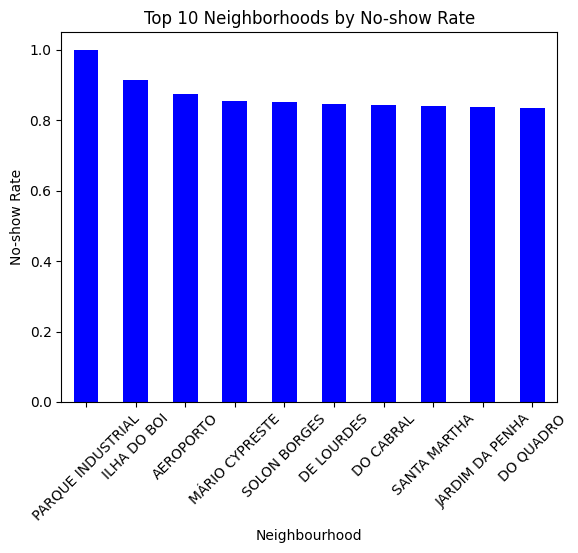

In [23]:
def plot_top_neighborhoods_no_show_rate(df, top_n=10):
    """
    Calculate and plot the top neighborhoods with the highest no-show rates.
    
    Parameters:
    df (DataFrame): The DataFrame containing appointment data with 'Neighbourhood' and 'No_show' columns.
    top_n (int): The number of top neighborhoods to display (default = 10).
    """
    # Calculate no-show rate by neighborhood
    neighborhood_no_show_rate = df.groupby('Neighbourhood')['No_show'].mean()
    
    # Get the top N neighborhoods with the highest no-show rates
    top_neighborhoods = neighborhood_no_show_rate.sort_values(ascending=False).head(top_n)
    
    # Plot
    top_neighborhoods.plot(kind='bar', color='blue')
    plt.title(f"Top {top_n} Neighborhoods by No-show Rate")
    plt.xlabel("Neighbourhood")
    plt.ylabel("No-show Rate")
    plt.xticks(rotation=45)
    plt.show()

plot_top_neighborhoods_no_show_rate(df)

- The chart shows that **PARQUE INDUSTRIAL** neighborhood has the highest no-show rate, approaching close to 100%.
- Other neighborhoods, such as **ILHA DO BOI, AEROPORTO, MARIO CYPESTRE, and SOLON BORGES**, also have relatively high no-show rates, but they are lower than that of the **PARQUE INDUSTRIAL** neighborhood.
- The neighborhoods shown have a no-show rate that consistently remains high, generally above 80%.

- The chart reveals that certain neighborhoods have notably high no-show rates. The **PARQUE INDUSTRIAL** neighborhood, in particular, stands out with a nearly 100% no-show rate, which could indicate specific factors affecting this area. Possible factors could include:
   - **Accessibility**: Residents in these neighborhoods may face difficulties in reaching the healthcare facility.
   - **Socioeconomic Status**: Some neighborhoods might have populations with lower socioeconomic backgrounds.
   - **Awareness or Reminder Mechanisms**: Certain areas may have less access to reminders or may have other barriers that lead to high no-show rates.

### Question 4: Is there a relationship between age and no-show rates?

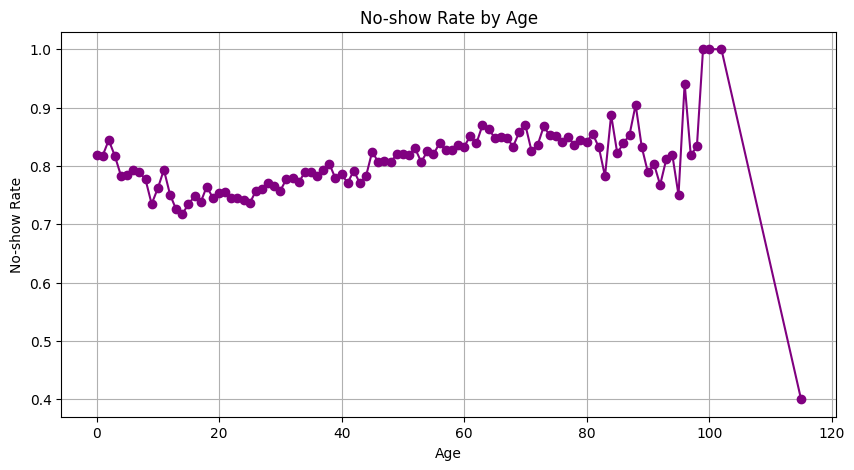

In [33]:
def plot_noshow_rate_by_age(df):
    """
    Calculate and plot the no-show rate for each age as a line plot.
    
    Parameters:
    df (DataFrame): The DataFrame containing appointment data with 'Age' and 'No_show' columns.
    """
    # Calculate no-show rate by age
    age_noshow_rate = df.groupby('Age')['No_show'].mean()
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(age_noshow_rate.index, age_noshow_rate.values, color='purple', marker='o')
    plt.title('No-show Rate by Age')
    plt.xlabel('Age')
    plt.ylabel('No-show Rate')
    plt.grid(True)
    plt.show()

plot_noshow_rate_by_age(df)

*The observations from the chart:*
- Younger children (0-5 years) and elderly individuals (80+ years) show higher no-show rates, likely due to dependency on caregivers or mobility issues.
- Ages 10-60 have relatively lower and more consistent no-show rates, suggesting they are more likely to attend appointments.
- Outliers: A sharp drop near age 115 could be due to data entry errors or a very small sample size.

### Question 5: Does having a scholarship affect showing up for appointments?

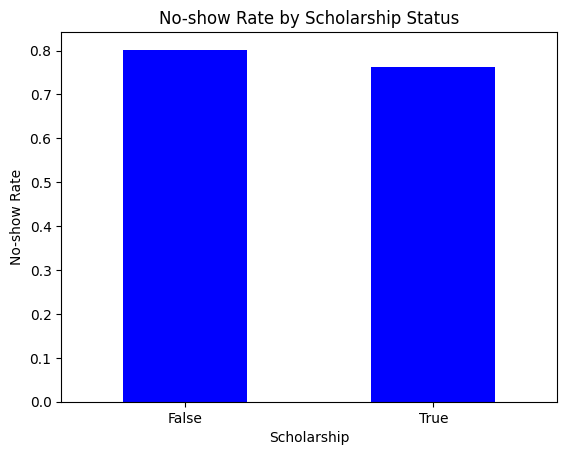

In [26]:
def plot_noshow_rate_by_scholarship(df):
    """
    Calculate and plot the no-show rate by Scholarship status.
    
    Parameters:
    df (DataFrame): The DataFrame containing appointment data with 'Scholarship' and 'No_show' columns.
    """
    # Calculate no-show rate by Scholarship status
    scholarship_no_show_rate = df.groupby('Scholarship')['No_show'].mean()
    
    # Plot
    scholarship_no_show_rate.plot(kind='bar', color='blue')
    plt.title("No-show Rate by Scholarship Status")
    plt.xlabel("Scholarship")
    plt.ylabel("No-show Rate")
    plt.xticks(rotation=0)
    plt.show()

plot_noshow_rate_by_scholarship(df)

- We can see that having a scholarship does not affect showing up to a hospital's appointment that much.

### Question 6: Is there a relationship between gender and no-show rates?

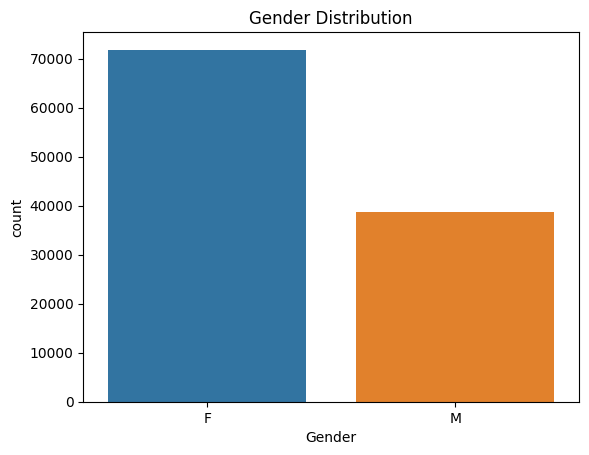

In [28]:
# viewing count plot of gender distribution in our dataset
sns.countplot(x = 'Gender', data = df)
plt.title("Gender Distribution")
plt.show()

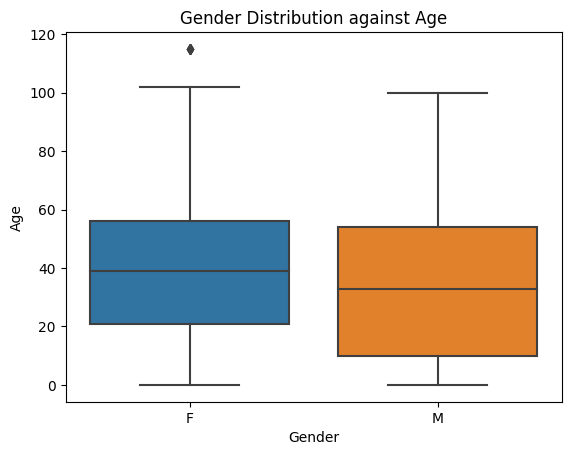

In [29]:
# viewing count plot of gender distribution against age in our dataset
sns.boxplot(x = 'Gender', y = 'Age', data = df)
plt.title("Gender Distribution against Age")
plt.show()

- Age distributions are similar for both genders, with slightly more spread among females and one outlier above 100.

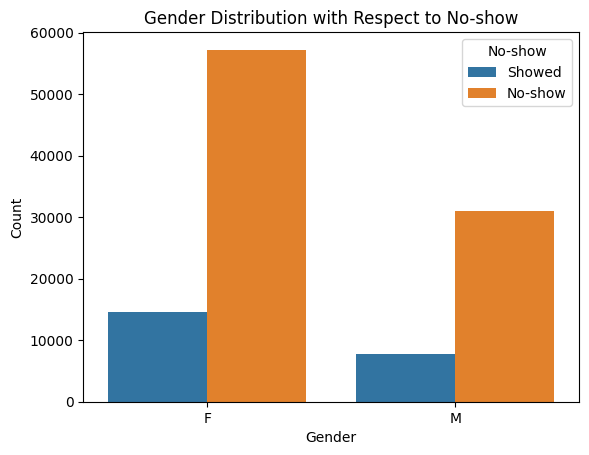

In [28]:
def plot_gender_distribution_by_noshow(df):
    """
    Plot the gender distribution with respect to the No_show column.
    
    Parameters:
    df (DataFrame): The DataFrame containing appointment data with 'Gender' and 'No_show' columns.
    """
    # Plot gender distribution with respect to no-show column
    sns.countplot(x='Gender', data=df, hue='No_show')
    plt.title('Gender Distribution with Respect to No-show')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.legend(title='No-show', labels=['Showed', 'No-show'])
    plt.show()

plot_gender_distribution_by_noshow(df)

- From the chart above, we can conclude that Female attend their appointments more than Male, but this may be affected by the proportion of Female in this dataset.

<a id='conclusions'></a>
## Conclusions

In this analysis of no-show medical appointments, several factors were explored to understand what influences patient's attendance. 
- **Here is a summary of the findings:**

   - **SMS reminders:** Receiving SMS reminders was associated with a lower rate of no-shows, suggesting that reminders can be effective in encouraging attendance.

    - **Chronic conditions:** Patients with chronic conditions such as hypertension or diabetes showed disparate attendance patterns, with a slight indication that those with health problems may be more likely to attend. This may indicate increased awareness of the need for medical care among patients with chronic conditions.

    - **Neighborhood Influence:** Certain neighborhoods, such as Parque Industrial, showed notably higher no-show rates. This could reflect socio-economic, accessibility, or awareness challenges in specific areas, highlighting the need for targeted outreach or facility accessibility improvements in these neighborhoods.

    - **Age-related patterns:** Younger children and elderly patients had higher rates of non-attendance, likely due to dependence on caregivers or mobility challenges. Addressing transportation or care support for these groups may improve their attendance rates.

    - **Scholarship Status:** Patients on a welfare program showed only a slight difference in no-show rates, suggesting that financial assistance alone does not significantly impact appointment attendance.

    - **Gender differences:** Females attended appointments more often than males. However, this may be influenced by the higher proportion of females in the dataset.

- **Limitations**
   - **Geographic and socioeconomic factors:** The analysis lacks socioeconomic data, which may further clarify the influence of neighborhood on attendance.

   - **Data quality:** There were some anomalies, such as extreme ages and potential data entry errors, which may limit the accuracy of age-related results.
   
- **Future Recommendations**
   - Collect additional data on socioeconomic status, distance from medical facilities, and patient satisfaction to refine the understanding of no-show rates.

This analysis highlights patterns that can help health providers implement more targeted solutions to reduce no-show rates and improve patient outcomes.

In [34]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 704647 bytes to Investigate_a_Dataset.html
